<a href="https://colab.research.google.com/github/aswathy7576/BigData-Analytics-BankMarketing/blob/main/Bank_Marketing_Analytics_Pyspark_7153.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



TERM DEPOSIT

    Term deposit is a deposit account type available in a financial institution where money is locked up for some fixed period of time.
    Term deposits are usually short-term deposits with maturities ranging from one month to a few years.

AIM

    USING THE GIVEN DATASET AND DEVELOPING A ML MODEL OUT OF IT WITH TARGET: DEPOSIT (YES /NO) FOR CLASSIFYING A NEW CUSTOMER BASED ON GIVEN FEATURES AND ALSO DETERMINING THE MOST RELEVANT FEATURE OF CLASSIFICATION

ABOUT NOTEBOOK

NOTEBOOK SECTIONS :

    

    1) PYSPARK INSTALLATION AND SETUP
    2)CHECKING PYSPARK SETUP
    3) LOADING DATATASET AND DERIVE INFORMATION(DROPPING IRRELEVANT FEATURES)
    4) PRE-PROCESSING OF DATASET
      1) IDENTIFYING DUPLICATES
      2) IDENTIFYING NULL VALUES
      3) REMOVAL OF "UNKNOWN" VALUES
      4) RENAMING LABEL COLUMN ("deposit" to "Subscribed")
      5) INDEXING AND ENCODING CATEGORICAL VARIABLES
      6) NORMALISATION OF ENCODED COLUMNS
    5)EXPLORATORY DATA ANALYSIS -DATA VISUALIZATION
    6)SPLITTING DATA INTO TRAINING AND TESTING SETS
    7)MACHINE LEARNING MODEL BUILDING & EVALUATION
      1)LOGISTIC REGRESSION
      2)DECISION TREE CLASSIFIER
      3)NAIVE BAYES CLASSIFIER
      4)UNSUPERVISED-KMEANS CLUSTERING
    8) FINDING MOST IMPORTANT FEATURES OF CLASSIFICATION OF DEPOSIT
    9) MODEL EVALUATION




In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
#!ls

os.chdir("/content/drive/My Drive/7153")

#!ls

#https://drive.google.com/drive/folders/1Uy9FuGZ5i20ANW489QX5YknJCgUYFOrE?usp=sharing

Mounted at /content/drive/


In [ ]:
!ls

'7153 CEM.docx'				   spark-3.0.0-bin-hadoop3.2
 bank-additional-full.csv		   spark-3.0.0-bin-hadoop3.2.tgz
 bank.csv				   spark-3.0.0-bin-hadoop3.2.tgz.1
 bank-full.csv				   spark-3.0.0-bin-hadoop3.2.tgz.2
'Bank Marketing Analytics Pyspark.ipynb'   spark-3.0.0-bin-hadoop3.2.tgz.3
 bank_new.csv				   spark-3.0.0-bin-hadoop3.2.tgz.4
 master.csv				   spark-warehouse


## **1.PYSPARK INSTALLATION AND SETUP**

In [ ]:
#!pip install wget


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq

Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u342-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u342-b07-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-jdk-headless:amd64.
Preparing to unpack .../openjdk-8-jdk-headless_8u342-b07-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jdk-headless:amd64 (8u342-b07-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u342-b07-0ubuntu1~18.04) ...
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/orbd to provide /usr/bin/orbd (orbd) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/servertool to provide /usr/bin/servertool (servertool) in auto mode
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/tnameserv to provide /usr/bin/tnameserv (tnameserv) in auto mode
Setting up ope

In [ ]:
#checking the existing installed java version
!java -version


openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
#decompressing the zipped file in current directory in gdrive
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
#setting the environment variables for spark and java
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-3.0.0/spark-3.0.0-bin-hadoop3.2"


In [ ]:
#installing findspark
!pip install -q findspark


In [ ]:
#installing the matching pyspark version
!pip install pyspark==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 204.7 MB 28 kB/s 
     |████████████████████████████████| 198 kB 67.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=c866dff16b52c7cd47463a1162e0b34e3979ccd7031b5b4dd271e253c2b57ea1
  Stored in directory: /root/.cache/pip/wheels/4e/c5/36/aef1bb711963a619063119cc032176106827a129c0be20e301
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
#checking pyspark version
print(pyspark.__version__)

3.0.0


In [ ]:
#adding pyspark to sys.path at run time
import findspark
findspark.init("spark-3.0.0-bin-hadoop3.2")

## **Testing Pyspark Setup and installation**





In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkConf,SparkContext

In [ ]:
spark = SparkSession.builder.master("local").appName("Search").config(conf=SparkConf()).getOrCreate()

In [ ]:
#creating a dataframe with columnames and value
df=spark.createDataFrame([{"language,usercount" :("java,2000")}])

/usr/local/lib/python3.7/dist-packages/pyspark/sql/session.py:378: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


In [ ]:
df.show(1)

+------------------+
|language,usercount|
+------------------+
|         java,2000|
+------------------+



# **Loading Dataset and deriving information**

In [ ]:
spark = SparkSession.builder.appName('Bank Marketing Analytics').getOrCreate()



In [ ]:
#creating spark dataframe from csv file
df = spark.read.csv('bank_new.csv', header = True, inferSchema = True)


In [ ]:

df.show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
row=df.count()
column=len(df.columns)

In [ ]:
print(f"dimension of dataframe is {(row,column)}")
print(f"number of rows are {row}")
print(f"number of columns are {column}")

dimension of dataframe is (11162, 17)
number of rows are 11162
number of columns are 17


In [ ]:
#SUMMARISING EACH COLUMN VALUES
df.summary().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|deposit|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+-------+
|  count|             11162|  11162|   11162|    11162|  11162|             11162|  11162|11162|   11162|             11162|11162|             11162|             11162|             11162|             11162|   11162|  11162|
|   mean|41.231947679627304|   null|    null|     null|   null|1528.5385235620856|   null| null|    null

In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [ ]:
df.describe()



DataFrame[summary: string, age: string, job: string, marital: string, education: string, default: string, balance: string, housing: string, loan: string, contact: string, day: string, month: string, duration: string, campaign: string, pdays: string, previous: string, poutcome: string, deposit: string]

## **Pre-Processing Of Dataset**

## **1.Identifying dupilcates**

In [ ]:
#1.Finding the duplicates if any .Here returns same no of records so  no duplicates in dataframe
#df.dropDuplicates().count()
df.distinct().count()

11162

In [ ]:
df.count()

11162

## **2.Identifying Null values**

In [ ]:
#checking null values
df_col=df.columns
from pyspark.sql.functions import col,isnan,when,count
null_col=df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_col]
   )
null_col.show()

#no null values occured

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|      0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+



## **3.Removal of unknown column values**

In [ ]:
df.select('poutcome').distinct().collect()

[Row(poutcome='success'),
 Row(poutcome='unknown'),
 Row(poutcome='other'),
 Row(poutcome='failure')]

In [ ]:
df.select('job').distinct().collect()

[Row(job='management'),
 Row(job='retired'),
 Row(job='unknown'),
 Row(job='self-employed'),
 Row(job='student'),
 Row(job='blue-collar'),
 Row(job='entrepreneur'),
 Row(job='admin.'),
 Row(job='technician'),
 Row(job='services'),
 Row(job='housemaid'),
 Row(job='unemployed')]

In [ ]:
df.select('education').distinct().collect()

[Row(education='unknown'),
 Row(education='tertiary'),
 Row(education='secondary'),
 Row(education='primary')]

In [ ]:
df.select('contact').distinct().collect()

[Row(contact='unknown'), Row(contact='cellular'), Row(contact='telephone')]

In [ ]:
#Creating a temporary Table named "bank" for filtering the columns
df.registerTempTable("bank")

#Filtering unknown values from all the columns using  "AND" "OR" in sparksql
#with this query ,The "other"attrinbute in poutcome also gets removed as it is not valid for data analysis
sqlfilter=spark.sql("SELECT * FROM bank WHERE job!='unknown' AND education!='unknown' AND marital!='unknown' AND loan!='unknown' AND (poutcome =='failure' OR poutcome == 'success')")

In [ ]:
#Storing in new variable to avoid nonetype error
df2=sqlfilter

In [ ]:
#Displaying new dataframe
df2.show()




+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+
|age|         job| marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+------------+--------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+-------+
| 33|    services| married|secondary|     no|   3444|    yes|  no|telephone| 21|  oct|     144|       1|   91|       4| failure|    yes|
| 56|  technician| married|secondary|     no|    589|    yes|  no|  unknown| 23|  oct|     518|       1|  147|       2| success|    yes|
| 34|      admin.| married| tertiary|     no|    899|    yes|  no|  unknown| 12|  nov|     114|       1|  170|       3| failure|    yes|
| 53|     retired| married| tertiary|     no|   2269|     no|  no| cellular| 17|  nov|    1091|       2|  150|       1| success|    yes|
| 37|  technician| married|secondary|    

In [ ]:
#no of records after removal of unknown values
df2.count()

2181

In [ ]:
#describibg dataframe
df2.describe()

DataFrame[summary: string, age: string, job: string, marital: string, education: string, default: string, balance: string, housing: string, loan: string, contact: string, day: string, month: string, duration: string, campaign: string, pdays: string, previous: string, poutcome: string, deposit: string]

In [ ]:
#summarise new dataframe
df2.summary().show()

+-------+------------------+----------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+-----------------+------------------+--------+-------+
|summary|               age|       job| marital|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|            pdays|          previous|poutcome|deposit|
+-------+------------------+----------+--------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+-----------------+------------------+--------+-------+
|  count|              2181|      2181|    2181|     2181|   2181|              2181|   2181|2181|    2181|              2181| 2181|              2181|              2181|             2181|              2181|    2181|   2181|
|   mean| 41.84364970197157|      null|    null|     null|   null| 1742.946813388354|   null|null|  

In [ ]:

#printing the distinct column values

df2.select('poutcome').distinct().collect()

[Row(poutcome='success'), Row(poutcome='failure')]

## **4.Renaming label column (deposit to Subscribed)for readability**

In [ ]:
rename=df2.withColumnRenamed("deposit","Subscribed")

In [ ]:
df_new=rename

In [ ]:
df_new.count()

2181

In [ ]:
df_new.show(5)

+---+----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+----------+
|age|       job|marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Subscribed|
+---+----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+----------+
| 33|  services|married|secondary|     no|   3444|    yes|  no|telephone| 21|  oct|     144|       1|   91|       4| failure|       yes|
| 56|technician|married|secondary|     no|    589|    yes|  no|  unknown| 23|  oct|     518|       1|  147|       2| success|       yes|
| 34|    admin.|married| tertiary|     no|    899|    yes|  no|  unknown| 12|  nov|     114|       1|  170|       3| failure|       yes|
| 53|   retired|married| tertiary|     no|   2269|     no|  no| cellular| 17|  nov|    1091|       2|  150|       1| success|       yes|
| 37|technician|married|secondary|     no

## **5.Indexing and Encoding the categorical variables**

In [ ]:
#Filtering categorical columns
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

#Creating an empty list for pipeline and assembler
list_stages = []

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [ ]:
#Using FOR LOOP for indexing and encoding all selected categorical columns
#STRING INDEXER  index all the columns and store in a new column with +INDEXED
#ONE HOT ENCODER encode all the indexed columns and store in a new column with +ENCODED
for i in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = i, outputCol = i + '_indexed')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[i+ "_encoded"])
    list_stages += [stringIndexer, encoder]

#Indexing predictor column 'Subscribed' as label and features
label_index= StringIndexer(inputCol = 'Subscribed', outputCol = 'label')

#Creating stages for both numeric and categorical columns
list_stages += [label_index]
numericColumns = ['age', 'balance', 'campaign', 'pdays', 'previous']

#Adding both to assembler
input_assembler = [c + "_encoded" for c in categoricalColumns] + numericColumns

#vectorizing to create new features column with indexed and encoded values.
assembler = VectorAssembler(inputCols=input_assembler, outputCol="features")
list_stages += [assembler]

In [ ]:
from pyspark.ml import Pipeline

In [ ]:

#combining all pipeline stages
pipeline = Pipeline(stages = list_stages)
#fitting the model
pipelineModel = pipeline.fit(df_new)
#transforming the model
df_new= pipelineModel.transform(df_new)

In [ ]:
#Storing in new variable to avoid none type error
df4=df_new

In [ ]:
df4.show(5)

+---+----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+----------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+
|age|       job|marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Subscribed|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|
+---+----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+----------+-----------+--------------+---------------+---------------+-----------------+-----------------+-

## **6.Normalisation of encoded columns**

In [ ]:
#Scaling of Data
#Only scaling the encoded columns as they are having different range of values
from pyspark.ml.feature import MinMaxScaler
encoded_vars=['features','job_encoded','marital_encoded','loan_encoded','default_encoded','education_encoded','housing_encoded','poutcome_encoded']

#Min max scaling to scale down between 0 and 1
minmaxscaler = [MinMaxScaler(inputCol=scale_features ,outputCol=scale_features+ "_SCALED") for scale_features in encoded_vars]

#PIPELINING FOR ALL THE COLUMNS AND FITTING IT AGAIN TO DF2
pipeline = Pipeline(stages=minmaxscaler)
model_scaler=  pipeline.fit(df_new)
scaled_df = model_scaler.transform(df_new)

In [ ]:
#DISPLAYING ALL THE NORMALIZED VALUES
scaled_df.show(5)

+---+----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+----------+-----------+--------------+---------------+---------------+-----------------+-----------------+---------------+---------------+---------------+---------------+------------+-------------+----------------+----------------+-----+--------------------+--------------------+------------------+----------------------+-------------------+----------------------+------------------------+----------------------+-----------------------+
|age|       job|marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|Subscribed|job_indexed|   job_encoded|marital_indexed|marital_encoded|education_indexed|education_encoded|default_indexed|default_encoded|housing_indexed|housing_encoded|loan_indexed| loan_encoded|poutcome_indexed|poutcome_encoded|label|            features|     features_SCALED|job_encoded_SCALED|marital_encoded

In [ ]:
#SELECTING ONLY THE REQUIRED COLUMNS FOR FURTHER SUPERVISED AND UNSUPERVISED LEARNING

df5=scaled_df.select('Subscribed','label','features','job_encoded_SCALED','marital_encoded_SCALED','loan_encoded_SCALED','default_encoded_SCALED','education_encoded_SCALED','housing_encoded_SCALED','poutcome_encoded_SCALED','features_SCALED')

In [ ]:
df5.take(1)

[Row(Subscribed='yes', label=0.0, features=SparseVector(23, {5: 1.0, 10: 1.0, 12: 1.0, 14: 1.0, 16: 1.0, 17: 1.0, 18: 33.0, 19: 3444.0, 20: 1.0, 21: 91.0, 22: 4.0}), job_encoded_SCALED=SparseVector(10, {5: 1.0}), marital_encoded_SCALED=DenseVector([1.0, 0.0]), loan_encoded_SCALED=DenseVector([1.0]), default_encoded_SCALED=DenseVector([1.0]), education_encoded_SCALED=DenseVector([1.0, 0.0]), housing_encoded_SCALED=DenseVector([0.0]), poutcome_encoded_SCALED=DenseVector([1.0]), features_SCALED=SparseVector(23, {5: 1.0, 10: 1.0, 12: 1.0, 14: 1.0, 16: 1.0, 17: 1.0, 18: 0.2143, 19: 0.0533, 21: 0.1055, 22: 0.0556}))]

## **Machine Learning model building and Evaluation**

KMeans Clustering-Unsupervised Learning

In [ ]:
# Perform unsupervised learning on df2 with k-means
# You can use whole df2 as both training and testing data,
# Evaluate the clustering result using Accuracy.
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
%matplotlib inline

In [ ]:
from pyspark.ml import Pipeline

#PERFORMING KMEANS CLUSTERING ON DF2 DATA FRAME
#WHOLE DATA IS USED AS TRAINING AND TESTING DATA AS IT IS UNSUPERVISED
# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(742).setFeaturesCol("features")
model = kmeans.fit(df5)
# Make predictions
predictions = model.transform(df5)
predictions.select('label', 'prediction').show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
|  0.0|         0|
+-----+----------+
only showing top 10 rows



In [ ]:
#APPLYING KMEANS USING ELBOW METHOD TO GET THE OPTIMAL VALUE OF K TO HELP IN ANALYSIS IN REPORT
# Trains a k-means model.
kmeans3=KMeans(featuresCol="features",k=3)
kmeans2=KMeans(featuresCol="features",k=2)
model_k3 = kmeans3.fit(df4)
model_k2 = kmeans2.fit(df4)

print (model_k3)
cost_k3=model_k3.summary.trainingCost
cost_k2=model_k2.summary.trainingCost
print("With K=3")
print("Within Set Sum of Squared Errors = " + str(cost_k3))
print('--'*30)
print("With K=2")
print("Within Set Sum of Squared Errors = " + str(cost_k2))

KMeansModel: uid=KMeans_68f2c5f87bb3, k=3, distanceMeasure=euclidean, numFeatures=23
With K=3
Within Set Sum of Squared Errors = 6809942425.071393
------------------------------------------------------------
With K=2
Within Set Sum of Squared Errors = 16703065509.310694


In [ ]:

    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    print("Silhouette with squared euclidean distance = " + str(silhouette))



Silhouette with squared euclidean distance = 0.9955086503489643


In [ ]:
#FINDING CLUSTER CENTRES FOR THE FIRST KMEANS WE HAD APPLIED TO DF2
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
 print(center)

Cluster Centers: 
[2.54703993e-01 1.62459844e-01 1.42267095e-01 1.24368977e-01
 8.94905920e-02 7.11335475e-02 4.31390546e-02 3.99265718e-02
 3.35016062e-02 1.97338229e-02 5.65855897e-01 3.40523176e-01
 5.00229463e-01 3.98347866e-01 9.96787517e-01 5.48416705e-01
 9.02248738e-01 5.39697109e-01 4.18155117e+01 1.68314640e+03
 1.82101882e+00 2.02914181e+02 3.09270307e+00]
[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 5.00000e-01 0.00000e+00
 0.00000e+00 0.00000e+00 5.00000e-01 0.00000e+00 5.00000e-01 0.00000e+00
 5.00000e-01 5.00000e-01 1.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 7.25000e+01 6.68955e+04 2.00000e+00 1.41500e+02 2.00000e+00]


In [ ]:
#CONVERTING THE PREDICTION AND LABEL DATA FRAME TO PANDAS FOR ACCURACY
import numpy as np
from sklearn.metrics import accuracy_score

#USING TOPANDAS FUNCTION FOR CONVERSION
y_true=predictions.toPandas()
y_pred=predictions.toPandas()

#USING ACCURACY FUNCTION TO FIND ACCURACY
accuracy_score(y_true.label, y_pred.prediction)

0.6886749197615772

## **Supervised Learning-Splitting data into train set and test set**

In [ ]:
#Splitting scaled dataset in 70% AND 30% ratio
train, test = df5.randomSplit([0.7, 0.3], seed = 742)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1540
Test Dataset Count: 641


**Classification -Logistic Regression**

In [ ]:

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#Building LR model and fitting to train set
LR = LogisticRegression(featuresCol = 'features_SCALED', labelCol = 'label', maxIter=10)
LR_model = LR.fit(train)

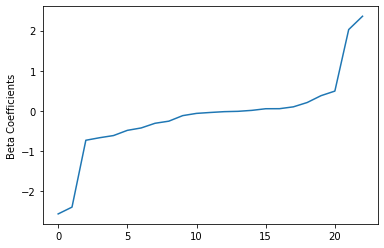

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
#sorting the coefficients
beta_coef = np.sort(LR_model.coefficients)

#plotting the coefficients
plt.plot(beta_coef)
plt.ylabel('Beta Coefficients')
plt.show()

In [ ]:
#Displaying the coefficient and intercept of the model
print(beta_coef)
print("Coefficients: " + str(LR_model.coefficients))
print("Intercept: " + str(LR_model.intercept))

[-2.56245614 -2.39329099 -0.72894848 -0.66562526 -0.61195461 -0.48246488
 -0.42261548 -0.30638277 -0.25365577 -0.11593598 -0.06005363 -0.03727342
 -0.01719841 -0.00880428  0.01508273  0.05560106  0.05692917  0.10278279
  0.21061537  0.38093549  0.49488607  2.02643564  2.35802913]
Coefficients: [-0.11593597634032905,0.05560106483969587,0.05692917050013604,0.38093548808297556,-0.2536557713914945,0.015082725188940384,-0.6656252635387444,-0.6119546125677278,0.21061536524791594,0.49488607488632846,-0.0372734171172424,-0.060053626608081015,-0.008804281762072257,-0.3063827661093845,-0.42261548168677826,-0.7289484838949549,-0.48246488488916073,2.026435642228449,-0.017198412245291103,-2.562456142957582,2.358029134786858,0.10278279253149321,-2.3932909891883374]
Intercept: -0.7793344296330789


## **Better the ROC better the model**

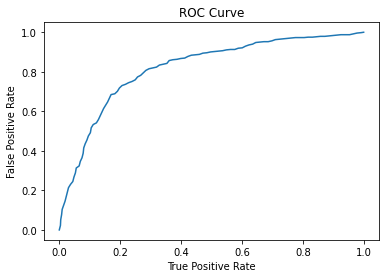

Training set areaUnderROC: 0.8180225352775534


In [ ]:
#ROC computation
#Summary function gives all the parameters
trainingSummary = LR_model.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

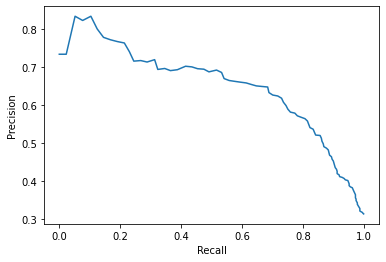

In [ ]:
#RECALL VS PRECISION graph
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
#CALCULATING PREDICTION AND PROBABILITY FOR ALL THE FEATURES
LR_predictions= LR_model.transform(test)
LR_predictions.select( 'features','label', 'rawPrediction', 'prediction', 'probability').show(10)

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|(23,[0,10,12,14,1...|  1.0|[2.42431948692267...|       0.0|[0.91866308610377...|
|(23,[0,10,12,14,1...|  1.0|[-0.1394982070808...|       1.0|[0.46518189256400...|
|(23,[0,10,12,14,1...|  1.0|[-0.2966828137176...|       1.0|[0.42636859649879...|
|(23,[0,10,13,14,1...|  1.0|[0.98137542427916...|       0.0|[0.72738104531559...|
|(23,[0,10,13,14,1...|  1.0|[0.84721961733564...|       0.0|[0.69998356870205...|
|(23,[0,10,13,14,1...|  1.0|[0.91382764481071...|       0.0|[0.71378277825887...|
|(23,[0,10,13,14,1...|  1.0|[-0.2793269885308...|       1.0|[0.43061878150569...|
|(23,[0,10,13,14,1...|  1.0|[-1.2793503095994...|       1.0|[0.21766083555062...|
|(23,[0,10,13,14,1...|  1.0|[0.03527376707084...|       0.0|[0.50881752752762...|
|(23,[0,10,13,14

In [ ]:
#Using BinaryClassificationEvaluator  for TEST AREA UNDER ROC .For binary class,default metric is Area under ROC

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator_ = BinaryClassificationEvaluator()
print('Test Area Under ROC is', evaluator_.evaluate(LR_predictions))

Test Area Under ROC is 0.8041048637461209


In [ ]:
#Comparing  LABEL AND PREDICTION for understanding accuracy
acc_df=LR_predictions.select("label","prediction").show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  1.0|       0.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       0.0|
|  1.0|       0.0|
+-----+----------+
only showing top 5 rows



In [ ]:
#Multi class Classification Evaluator for accuracy
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

eval1 = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='label', metricName='accuracy')
acc = eval1.evaluate(LR_predictions)
print("accuracy=%g" %(acc))

accuracy=0.75507


In [ ]:
# CONFUSION MATRIX
from pyspark.mllib.evaluation import MulticlassMetrics
pred_label=LR_predictions.select( 'label', 'prediction').rdd
metrics = MulticlassMetrics(pred_label)
print(metrics.confusionMatrix())

DenseMatrix([[365.,  76.],
             [ 81., 119.]])


In [ ]:
#PRECISION, RECALL and F1SCORE
cm=metrics.confusionMatrix().toArray()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("Logistic regression:--precision,recall,f1score",precision,recall,f1score)

Logistic regression:--precision,recall,f1score 0.8183856502242153 0.8276643990929705 0.8229988726042842


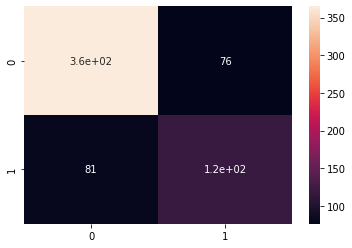

In [ ]:
#PLOTTING HEATMAP OF ALL THE METRICS PARAMETERS USING SEABORN PACKAGE
import seaborn as sns
sns.heatmap(cm, annot=True)

DECISION TREE CLASSIFIER



In [ ]:

#Import Decision Tree Classifier model

from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
#Fitting to train and test data
DT_Model = dt.fit(train)
prediction1= DT_Model.transform(test)
prediction1.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+-------------+----------+--------------------+
|label|rawPrediction|prediction|         probability|
+-----+-------------+----------+--------------------+
|  1.0| [655.0,63.0]|       0.0|[0.91225626740947...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0| [199.0,98.0]|       0.0|[0.67003367003367...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
|  1.0|[167.0,294.0]|       1.0|[0.36225596529284...|
+-----+-------------+----------+--------------------+
only showing top 10 rows



In [ ]:
#AREA UNDER ROC curve
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(prediction1, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7771760377141542


In [ ]:
#CALCULATING ACCURACY
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

eval2 = MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='label', metricName='accuracy')
acc1 = eval2.evaluate(prediction1)
print("accuracy=%g" %(acc1))

accuracy=0.764431


In [ ]:
#CONFUSION MATRIX
from pyspark.mllib.evaluation import MulticlassMetrics
pred_label1=prediction1.select( 'label', 'prediction').rdd
metrics1 = MulticlassMetrics(pred_label1)
print(metrics1.confusionMatrix())

DenseMatrix([[364.,  69.],
             [ 82., 126.]])


In [ ]:
# RECALL, PRECISION AND F1SCORE
cm=metrics1.confusionMatrix().toArray()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("Decision Tree:precision,recall,f1score",precision,recall,f1score)

Decision Tree:precision,recall,f1score 0.8161434977578476 0.8406466512702079 0.8282138794084187


In [ ]:
#PRINTING ALL THE IMPORTANT FEATURES
DT_Model.featureImportances

SparseVector(23, {1: 0.0075, 3: 0.0282, 15: 0.1401, 17: 0.7534, 21: 0.0597, 22: 0.0112})

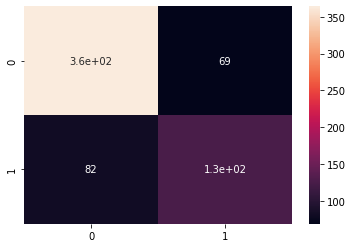

In [ ]:
#PLOTTING METRICS AS SEABORN
import seaborn as sns
sns.heatmap(cm, annot=True)

## **NAIVE BAYES CLASSIFIER**

In [ ]:
#IMPORTING NAIVE BAYES PACKAGE
from pyspark.ml.classification import NaiveBayes

#SELECTING NORMALIZED COLUMNS FOR MODELLING
nb=predictions.select('label','job_encoded_SCALED','marital_encoded_SCALED','loan_encoded_SCALED','default_encoded_SCALED','education_encoded_SCALED','housing_encoded_SCALED','poutcome_encoded_SCALED','features_SCALED',"prediction")

In [ ]:
#Renaming features_SCALED  to  'features'
nb = nb.selectExpr("label as label","features_SCALED as features")
nb.show(3)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(23,[5,10,12,14,1...|
|  0.0|(23,[1,10,12,14,1...|
|  0.0|(23,[2,10,13,14,1...|
+-----+--------------------+
only showing top 3 rows



In [ ]:
#SPLITTING THE LABEL AND FEATURES DATA AS TRAIN AND TEST DATA
train_1, test_1 = nb.randomSplit([0.7, 0.3], seed = 742)

In [ ]:
#Naive bayes fitting to train and test data
#USING MULTINOMIAL METHOD BECAUSE BERNOULLI REQUIRES ONLY BINARY INPUT
nb1=NaiveBayes(modelType="multinomial")
nbmodel=nb1.fit(train_1)
nb_predictions=nbmodel.transform(test_1)

nb_evaluator=MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

#EVALUATING PREDICTION AND PROBABILITY VALUES
nb_accuracy=nb_evaluator.evaluate(nb_predictions)
nb_predictions.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)


print("Test Area Under ROC: " + str(evaluator.evaluate(nb_predictions, {evaluator.metricName: "areaUnderROC"})))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[-18.128101289108...|       0.0|[0.71227863685887...|
|  0.0|[-18.905025587194...|       0.0|[0.83308795651024...|
|  0.0|[-17.210598336493...|       0.0|[0.83078085549233...|
|  0.0|[-16.368239992271...|       0.0|[0.82011846673742...|
|  0.0|[-18.122511379455...|       0.0|[0.51656396890790...|
|  0.0|[-18.379947725811...|       0.0|[0.52612872952829...|
|  0.0|[-17.219309198880...|       0.0|[0.54173239419087...|
|  0.0|[-19.904541403547...|       0.0|[0.80183300993376...|
|  0.0|[-22.618681384194...|       0.0|[0.76733814845131...|
|  0.0|[-20.750414292819...|       0.0|[0.80281500588117...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows

Test Area Under ROC: 0.5786054421768712


In [ ]:
#CALCULATING ACCURACY
print("accuracy=%g" %(nb_accuracy))

accuracy=0.74415


In [ ]:
#Confusion matrix
from pyspark.mllib.evaluation import MulticlassMetrics
pred_and_label=nb_predictions.select( 'label', 'prediction').rdd
metrics2 = MulticlassMetrics(pred_and_label)
print(metrics2.confusionMatrix())

DenseMatrix([[386., 109.],
             [ 55.,  91.]])


In [ ]:
#CALCULATING PRECISION, RECALL AND F1SCORE
cm2=metrics2.confusionMatrix().toArray()
precision=(cm2[0][0])/(cm2[0][0]+cm2[1][0])
recall=(cm2[0][0])/(cm2[0][0]+cm2[0][1])
f1score =((2*precision*recall )/ (precision + recall))

print("NAIVE BAYES model:precision,recall,f1score",precision,recall,f1score)

NAIVE BAYES model:precision,recall,f1score 0.8752834467120182 0.7797979797979798 0.8247863247863249


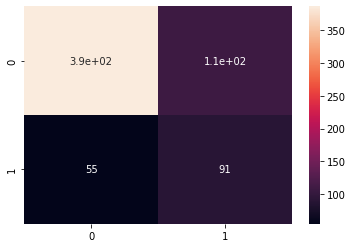

In [ ]:
#plotting heatmap
import seaborn as sns
sns.heatmap(cm2, annot=True)